# 2. 워드클라우드 만들기

In [52]:
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np 
import pandas as pd
from PIL import Image
import re

okt = Okt()

def get_csv(path) :
    data = pd.read_csv(path, index_col=0).dropna().reset_index(drop=True)
    data.head()
    print(len(data))

get_csv("07_data/구글플레이스토어_배달의민족_리뷰.csv")

400


## 리뷰 검색

In [ ]:
keyword = "수수료"

# 조건: data에 text열에서 keyword가 속해있어야 한다.
extract_data = data.loc[data["content"].str.contains(keyword),:]
extract_data

# extract_data.to_csv("수수료_CSV/당근_수수료_관련리뷰(소비자).csv")
# extract_data.to_csv("수수료_CSV/제로페이_수수료_관련리뷰(판매자).csv")

In [ ]:
keyword = "서울페이"

# 조건: data에 text열에서 keyword가 속해있어야 한다.
extract_data = data.loc[data["content"].str.contains(keyword),:]
extract_data

# extract_data.to_csv("수수료_CSV/땡겨요_수수료_관련리뷰(판매자).csv")
# extract_data.to_csv("result/서울페이_명사_가맹_리뷰만.csv")

In [ ]:
keyword = "가맹점"

# 조건: data에 text열에서 keyword가 속해있어야 한다.
extract_data = data.loc[data["content"].str.contains(keyword),:]
extract_data

# extract_data.to_csv("result/땡겨요_가맹정_관련리뷰.csv")
# extract_data.to_csv("result/서울페이_명사_결제_리뷰만.csv")

In [5]:
keyword = "비대면"

# 조건: data에 text열에서 keyword가 속해있어야 한다.
extract_data = data.loc[data["content"].str.contains(keyword),:]
extract_data

# extract_data.to_csv("result/서울페이_명사_비대면_리뷰만.csv")

,customer_id,star,enroll_date,content
16,최미선,5,2025-07-01,항상 잘쓰고 있습니다 비대면결제시 가맹점에 즐겨찾기 기능이 있었으면 좋겠습니다. 주...
41,Kelly J,2,2024-08-03,"결제 방법으로 예전 앱처럼 QR, 바코드 말고도 삼성페이처럼 터치 카드결제 기능도 ..."
42,Eunju Jung,5,2024-04-22,비대면결제 기능을 많이 사용하는데 메인화면에서 접근하기가 좋아서 편합니다. 결제수단...
55,미니쭈니맘,1,2024-05-03,잘쓰던 비대면 결제를 갑자기 왜 막아둔건지 이해하기 힘드네요. 고객센터에 전화해도 ...
88,Yong Joo Jun,2,2024-04-23,기존 비대면 결제에서 카드 결제 사라져서 무조건 상품권으로 결제해야함. 기존에 지원...
112,Soul Great,4,2024-04-22,비대면결제 시 메모란에 입력한 내용이 결제 완료 화면에는 안 뜨는데 수정 부탁 드립니다!
124,yeonho cho,1,2024-07-07,서울페이+이후 잘되던 비대면 결제가 불가한 가맹점이 많네요. 너무 불편해요.
153,박성호,1,2025-01-08,상품권 발행한다고 비대면결제를 막아버리면 어쩌자는겁니까. 공지에도 가맹점찾기 선물하...
177,윤은경,1,2024-05-03,바뀌기전에 비대면 결제 가능했던 상점들이 바뀌면서 비대면결제 불가능이라 나오는데 어...
181,박태석,5,2024-05-12,지금 현재 비대면 결제가 되지 않고 있습니다 어플에 문제가 있나요 즉답 바랍니다 감...


## 긍부정 분석

In [6]:
data.head()

,customer_id,star,enroll_date,content
0,김지호,1,2025-05-17,"땡겨요 쓰려고 깔았는데요, SK사태로 문자 인증이 안돼서 사용을 못합니다. 카드로 ..."
1,김영운,1,2024-05-30,"앱 설계가 이상한건지, 서버 관리 능력이 부족한건지.. 아무리 사람이 몰린다고 해도..."
2,짱구,1,2024-06-15,갤럭시s7 모델은 터치결제 오류 뜹니다 결제 처리 중 오류가 발생하였습니다. (-3...
3,윤발이 (윤발이),4,2024-04-24,가맹점 입니다 구번전 실행하면 설치하게 팝업안내 한다더니 팝업 안뜹니다 플레이스토어...
4,유오세인트,5,2024-04-21,"주로 한 지역 전용 앱을 이용해 왔는데요, 이번 업데이트 된 앱은 다양한 니즈를 잘..."


In [47]:
# (미션) reaction열을 만드는데 score가 4이상이면 긍정(1), 그 외는 부정(0)으로 나타내주세요
data["reaction"] = np.where(data["star"] >= 4, 1, 0)
# data.head()
print(len(data))

data_list1 = data[data["reaction"] == 1]
data_list1.to_csv("wordcloud/땡겨요_긍정_리뷰.csv")

data_list2 = data[data["reaction"] == 0]
data_list2.to_csv("wordcloud/땡겨요_부정_리뷰.csv")

1940


In [48]:
# 파일 경로를 지정하여 파일 열기
file_path = "wordcloud/땡겨요_긍정_리뷰.txt"
# 파일 쓰기 모드로 열기
with open(file_path, "w", encoding="utf-8") as file:
    file.write(" ".join(word_list))

## 서울페이 부정 워드클라우드(단어)

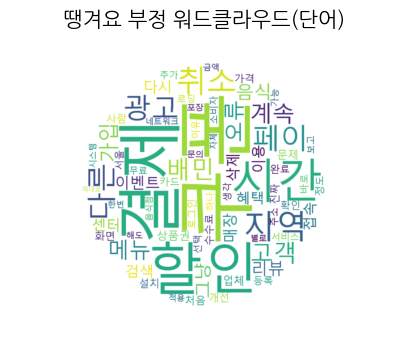

In [ ]:
# data = pd.read_csv("result/땡겨요_부정_동사_형용사_리뷰만.csv", index_col=0).dropna().reset_index(drop=True)
# data.head()

word_list = []
stopwords = ["땡겨요", "배달", "어플", "사용", "주문" ,"가게"]


for i, review in enumerate(data.loc[data["reaction"] == 0, "content"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word in result:
        if len(word) > 1 and word not in stopwords:
            word_list.append(word)
# print(word_list)

# # 파일 경로를 지정하여 파일 열기
# file_path = "wordcloud/땡겨요_부정_리뷰.txt"
# # 파일 쓰기 모드로 열기
# with open(file_path, "w", encoding="utf-8") as file:
#     file.write(" ".join(word_list))

counter = Counter(word_list)
# print(counter)
# print(counter.most_common(30))


image = Image.open("../resources/circle.png")
mask_img = np.array(image)

wc = WordCloud(
    font_path = "C:\Windodws\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
wc.generate_from_frequencies(dict(counter.most_common(70)))

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("땡겨요 부정 워드클라우드(단어)", fontsize=15)
plt.show()

## 서울페이 긍정 워드클라우드(단어)

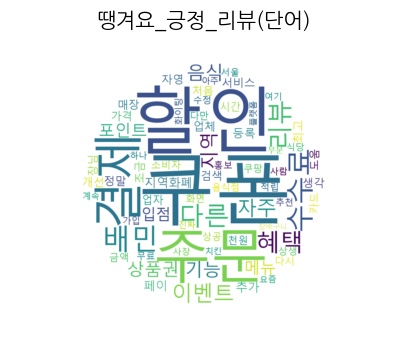

In [49]:
# data = pd.read_csv("result/땡겨요_가맹정_관련리뷰.csv", index_col=0).dropna().reset_index(drop=True)
# data.head()

word_list = []
stopwords = ["배달", "사용", "이용", "어플", "가게"]


for i, review in enumerate(data.loc[data["reaction"] == 1, "content"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word in result:
        if len(word) > 1 and word not in stopwords:
            word_list.append(word)
# print(word_list)

# # 파일 경로를 지정하여 파일 열기
# file_path = "wordcloud/땡겨요_긍정_리뷰.txt"
# # 파일 쓰기 모드로 열기
# with open(file_path, "w", encoding="utf-8") as file:
#     file.write(" ".join(word_list))

counter = Counter(word_list)
# print(counter)
# print(counter.most_common(30))



image = Image.open("../resources/circle.png")
mask_img = np.array(image)

wc = WordCloud(
    font_path = "C:\Windodws\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
wc.generate_from_frequencies(dict(counter.most_common(70)))

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("땡겨요_긍정_리뷰(단어)", fontsize=15)
plt.show()

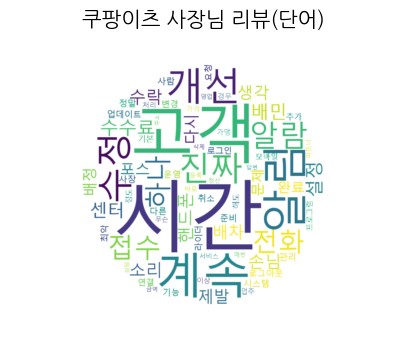

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
from PIL import Image
import numpy as np
import re
okt = Okt()

data = pd.read_csv("07_data/구글플레이스토어_쿠팡이츠사장님_리뷰.csv", index_col=0).dropna().reset_index(drop=True)
data.head()

word_list = []
stopwords = ["배달", "쿠팡", "메뉴", "주문", "음식", "가게", "그냥", "어플", "한번", "사용", "확인", "리뷰", "조리","기사", "매장"]

for i, review in enumerate(data["content"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word in result:
        if len(word) > 1 and word not in stopwords:
            word_list.append(word)
    ### 출력 메세지 ###
#     print(f"{i}번째 리뷰: {new_review}")
# print(word_list)


counter = Counter(word_list)
# print(counter)
# print(counter.most_common(30))


image = Image.open("../resources/circle.png")
mask_img = np.array(image)

wc = WordCloud(
    font_path = "C:\Windodws\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
wc.generate_from_frequencies(dict(counter.most_common(70)))

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("쿠팡이츠 사장님 리뷰(단어)", fontsize=15)
plt.show()

In [ ]:
"배달", "쿠팡", "메뉴", "주문", "음식", "가게", "그냥", "어플", "한번", "사용", "확인", "리뷰"

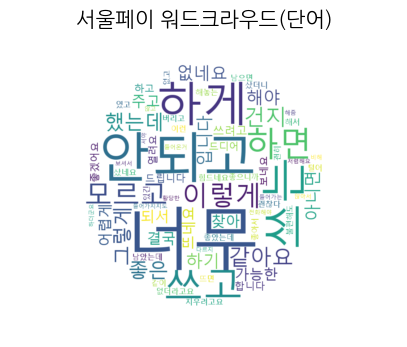

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
from PIL import Image
import numpy as np
import re
okt = Okt()

data = pd.read_csv("result/땡겨요_부정_동사_형용사_리뷰만.csv", index_col=0).dropna().reset_index(drop=True)
data.head()

word_list = []
stopwords = ["땡겨요"]

for i, review in enumerate(data["content"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.pos(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word, pos in result:
        if len(word) > 1 and word not in stopwords and pos in ["Adjective", "Verb", "Adverb"]:
            word_list.append(word)
    ### 출력 메세지 ###
#     print(f"{i}번째 리뷰: {new_review}")
# print(word_list)


counter = Counter(word_list)
# print(counter)
# print(counter.most_common(30))


image = Image.open("../resources/circle.png")
mask_img = np.array(image)

wc = WordCloud(
    font_path = "C:\Windodws\Fonts\malgun.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
wc.generate_from_frequencies(dict(counter.most_common(70)))

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("서울페이 워드크라우드(단어)", fontsize=15)
plt.show()